## Week 4 Data Exploration

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# for plotting
import matplotlib.pyplot as plt
import numpy as np

### Import population file

In [2]:
pop = gpd.read_file('worldpop.geojson')

In [3]:
pop.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,iso3,Country Name,1960,1961,1962,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,geometry
0,1,American Samoa,AS,United States,US,ASM,American Samoa,20123.0,20602.0,21253.0,...,55667.0,55713.0,55791.0,55812.0,55741.0,55620.0,55465.0,55312.0,None,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,4,French Polynesia,PF,France,FR,PYF,French Polynesia,78076.0,80706.0,83655.0,...,268998.0,270328.0,271705.0,273124.0,274575.0,276103.0,277679.0,279287.0,None,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
2,7,Samoa,WS,Samoa,WS,WSM,Samoa,108629.0,112105.0,115776.0,...,189088.0,190717.0,192221.0,193513.0,194535.0,195352.0,196130.0,197097.0,None,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
3,9,Tonga,TO,Tonga,TO,TON,Tonga,61577.0,63715.0,66235.0,...,102737.0,101768.0,101028.0,100781.0,101133.0,101998.0,103197.0,104494.0,None,"MULTIPOLYGON (((-175.14529 -21.26806, -175.186..."
4,11,El Salvador,SV,El Salvador,SV,SLV,El Salvador,2766324.0,2846600.0,2931192.0,...,6237923.0,6266070.0,6295128.0,6325124.0,6356143.0,6388122.0,6420744.0,6453553.0,None,"POLYGON ((-87.69467 13.81901, -87.72501 13.733..."


### Import plastic waste generation file

In [4]:
plastic = gpd.read_file('plastic.csv')
#this dataset contains the total plastic waste generation in each country in 2010

In [5]:
plastic.head()

,Entity,Code,"Plastic waste generation (tonnes, total)",geometry
0,Albania,ALB,73364,None
1,Algeria,DZA,1898343,None
2,Angola,AGO,528843,None
3,Antigua and Barbuda,ATG,22804,None
4,Argentina,ARG,2753550,None


### Trim population file and plastic file to the columns that need to be kept

In [6]:
list(pop)

['FID',
 'COUNTRY',
 'ISO',
 'COUNTRYAFF',
 'AFF_ISO',
 'iso3',
 'Country Name',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 'geometry']

In [7]:
columns_to_keep = [
 'COUNTRY',
 'iso3',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 'geometry']

In [8]:
pop = pop[columns_to_keep]

In [9]:
plastic = plastic.drop(columns=['geometry', 'Entity'])

In [10]:
plastic

,Code,"Plastic waste generation (tonnes, total)"
0,ALB,73364
1,DZA,1898343
2,AGO,528843
3,ATG,22804
4,ARG,2753550
...,...,...
163,URY,310379
164,VUT,25443
165,VEN,2669998
166,VNM,3268227


In [11]:
plastic.shape

(168, 2)

In [12]:
pop.shape

(214, 53)

### Rename columns

In [13]:
list(plastic)

['Code', 'Plastic waste generation (tonnes, total)']

In [14]:
plastic.columns = ['iso3', 'total_tonnes']

### Join plastic generation file with population file based on country code

In [15]:
joined = pd.merge(pop,plastic,on=['iso3'])

I initially used country names to join the two data frames and found out that a lot of the rows failed to be joined together because the same country might appear with different names in two files, e.g. in one file Russia is "Russian Federation" and in the other it is just "Russia." This is why I decided to join them on country code, which proved to be successful.

In [16]:
joined.sample()

,COUNTRY,iso3,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,geometry,total_tonnes
101,France,FRA,48582611.0,49230595.0,49818028.0,50330262.0,50775794.0,51175508.0,51561836.0,51957738.0,...,63179351.0,63621381.0,64016225.0,64374984.0,64707040.0,65027507.0,65342780.0,65659809.0,"MULTIPOLYGON (((1.78172 42.56996, 1.73861 42.6...",4557128


In [17]:
joined.shape

(166, 54)

Compared to the 168 rows of the plastic file, the 166 rows of the joined file suggests that there are still rows that were not joined.

### Use a for loop to find the country codes that were not joined

In [18]:
for i in plastic.sort_values('iso3')['iso3']:
    for z in joined.sort_values('iso3')['iso3']:
        if i == z:
            break
    if i != z:
        print (i)
            

HKG
MAC
OWID_CIS


It seems that Hong Kong and Macau are counted as separate entities from China in the plastic dataset, which is why they haven't been joined to the population file. Channel Islands are also singled out and do not appear in the population file, so may have to be ommitted. 

### Add the pollution values of Hong Kong and Macau to the pollution value of China

In [19]:
joined[joined['COUNTRY']=='China'].index.values

array([152])

In [20]:
plastic[plastic['iso3']=='HKG'].index.values

array([69])

In [21]:
plastic[plastic['iso3']=='MAC'].index.values

array([89])

In [22]:
joined['total_tonnes'] = pd.to_numeric(joined['total_tonnes'])
joined['total_tonnes'][152]

59079741

In [23]:
joined.at[152,'total_tonnes'] = int(joined['total_tonnes'][152]) + int(plastic['total_tonnes'][69]) + int(plastic['total_tonnes'][89])
joined['total_tonnes'][152]

60172273

Above is the total tonnes of plastic generation in China in 2010.

In [24]:
joined.sample()

,COUNTRY,iso3,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,geometry,total_tonnes
165,Canarias,ESP,31296651.0,31609195.0,31954292.0,32283194.0,32682947.0,33113134.0,33441054.0,33814531.0,...,43653155.0,44397319.0,45226803.0,45954106.0,46362946.0,46576897.0,46742697.0,46773055.0,"MULTIPOLYGON (((-17.91125 27.77374, -17.96389 ...",4709157


### Read the file on death rate caused by air pollution

In [25]:
Air = gpd.read_file("air.csv")
#this file contains death rate of each country caused by air pollution from 1990 to 2017.

In [26]:
Air.head()

,Entity,Code,Year,Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate),geometry
0,Afghanistan,AFG,1990,299.4773088832807,None
1,Afghanistan,AFG,1991,291.2779667340464,None
2,Afghanistan,AFG,1992,278.96305561506625,None
3,Afghanistan,AFG,1993,278.79081474634074,None
4,Afghanistan,AFG,1994,287.16292317725527,None


Because the `air` file contains death rate of countries across many years, we can maximize comparability by also choosing the year 2010 in this file to join with the plastic file. 

### Filter the `air` file

In [27]:
air = Air[Air['Year'] == '2010']

In [28]:
list(air.Year)

['2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 

This code above verifies the all the values we have are of the year 2010.

### Trim and rename columns in `air`

In [29]:
list(air)

['Entity',
 'Code',
 'Year',
 'Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)',
 'geometry']

In [30]:
air.columns = ['COUNTRY',
 'iso3',
 'Year',
 'AP_Death_Rate',
 'geometry']

In [31]:
air = air[['iso3',
 'AP_Death_Rate']]

In [32]:
air.sample()

,iso3,AP_Death_Rate
5284,SSD,165.8014153623583


### Convert column of strings to numerical values

In [33]:
air['AP_Death_Rate'] = pd.to_numeric(air['AP_Death_Rate'], errors='coerce')

### Join `air` with `joined`

In [34]:
joined = pd.merge(joined,air,on=['iso3'])

In [35]:
joined.sample()

,COUNTRY,iso3,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,geometry,total_tonnes,AP_Death_Rate
122,Somalia,SOM,2936477.0,3001158.0,3068459.0,3143648.0,3227841.0,3312742.0,3386738.0,3444568.0,...,10763905.0,11080121.0,11397188.0,11717692.0,12043883.0,12376302.0,12715510.0,"POLYGON ((45.86945 10.84416, 45.89750 10.83027...",237569,185.735123


### Import file on coral bleaching

In [36]:
coral = gpd.read_file('CoralBleaching.csv')

In [37]:
list(coral)

['ID',
 'REGION',
 'SUBREGION',
 'COUNTRY',
 'LOCATION',
 'LAT',
 'LON',
 'MONTH',
 'YEAR',
 'DEPTH',
 'SEVERITY_CODE',
 'BLEACHING_SEVERITY',
 'CORAL_FAMILY',
 'CORAL_SPECIES',
 'PERCENTAGE_AFFECTED',
 'BLEACHING_DURATION',
 'MORTALITY_CODE',
 'MORTALITY',
 'RECOVERY_CODE',
 'RECOVERY',
 'SURVEY_TYPE',
 'SURVEY_AREA',
 'WATER_TEMPERATURE',
 'OTHER_FACTORS',
 'REMARKS',
 'SOURCE',
 'REFERENCE_CODE',
 'COUNTRY_CODE',
 'geometry']

In [38]:
coral['BLEACHING_SEVERITY']

0           No Bleaching
1           No Bleaching
2           No Bleaching
3       Severity Unknown
4           No Bleaching
              ...       
6185    Severity Unknown
6186                 Low
6187                HIGH
6188                 Low
6189                 Low
Name: BLEACHING_SEVERITY, Length: 6190, dtype: object

### Convert the coordinates values in the file to numerical values

In [39]:
y2010 = coral[coral['YEAR']=='2010'].copy() #also choose 2010 data in this file to match with the rest of the dataset
y2010['LAT'] = pd.to_numeric(y2010['LAT'],errors='coerce')
y2010['LON'] = pd.to_numeric(y2010['LON'],errors='coerce')
h2010 = y2010[y2010['BLEACHING_SEVERITY']=='HIGH']
m2010 = y2010[y2010['BLEACHING_SEVERITY']=='Medium']
l2010 = y2010[y2010['BLEACHING_SEVERITY']=='Low']

### Categorize coordinates based on bleaching severity

In [40]:
la_h = h2010['LAT'].tolist() #latitude_high
lo_h = h2010['LON'].tolist()
la_m = m2010['LAT'].tolist()
lo_m = m2010['LON'].tolist()
la_l = h2010['LAT'].tolist()
lo_l = l2010['LON'].tolist()

### Convert coordinates into geoDataframe

In [41]:
from shapely.geometry import Point #not quite sure what this does

In [42]:
geometry_h = [Point(xy) for xy in zip(lo_h,la_h)]
high_bleaching_2010 = gpd.GeoDataFrame(geometry = geometry_h)
geometry_m = [Point(xy) for xy in zip(lo_m,la_m)]
medium_bleaching_2010 = gpd.GeoDataFrame(geometry = geometry_m)
geometry_l = [Point(xy) for xy in zip(lo_l,la_l)]
low_bleaching_2010 = gpd.GeoDataFrame(geometry = geometry_l)

### Create maps!

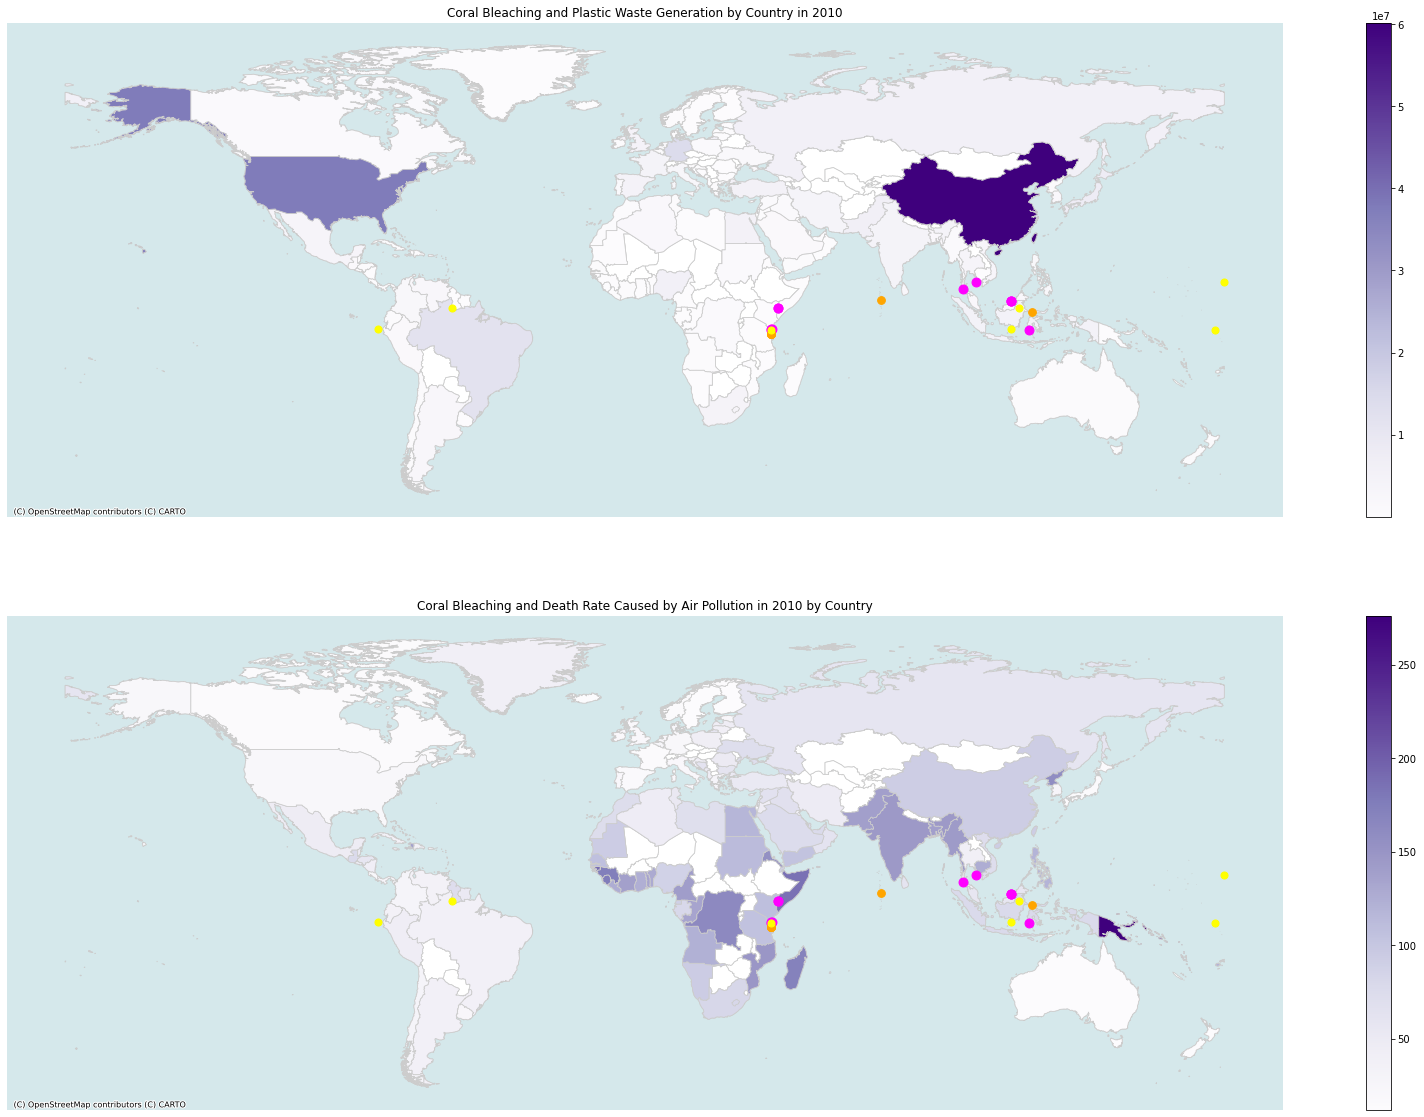

In [43]:
joined = joined.to_crs('epsg:4326')
#what does the above line alter?
# use subplots to set up the canvas
fig, axs = plt.subplots(2,1,figsize=(30,20))
ax1, ax2 = axs

#layer 1
pop.plot(ax=ax1,
         figsize=(30,20),
         color='white',
         linewidth=0.8,
         edgecolor='0.8')
#layer 2
joined.plot(ax=ax1,
            figsize=(30,20),
            cmap='Purples',
            column='total_tonnes',
            linewidth=0.8,
            edgecolor='0.8',
            legend= True)
#layer 3
high_bleaching_2010.plot(ax=ax1, 
           marker="o",
           markersize=80, 
           alpha=1, 
           c="fuchsia")
medium_bleaching_2010.plot(ax=ax1, 
           marker="o",
           markersize=60, 
           alpha=1, 
           c="orange")
low_bleaching_2010.plot(ax=ax1, 
           marker="o",
           markersize=50, 
           alpha=1, 
           c="yellow")


# add a title
ax1.set_title('Coral Bleaching and Plastic Waste Generation by Country in 2010')

# get rid of the axis
ax1.axis('off')
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Voyager)

#layer 1
pop.plot(ax=ax2,
         figsize=(30,20),
         color='white',
         linewidth=0.8,
         edgecolor='0.8')
#layer 2
joined.plot(ax=ax2,
            figsize=(30,20),
            cmap='Purples',
            column='AP_Death_Rate',
            linewidth=0.8,
            edgecolor='0.8',
            legend= True)
#layer 3
high_bleaching_2010.plot(ax=ax2, 
           marker="o",
           markersize=80, 
           alpha=1,
           c="fuchsia")
medium_bleaching_2010.plot(ax=ax2, 
           marker="o",
           markersize=60, 
           alpha=1, 
           c="orange")
low_bleaching_2010.plot(ax=ax2, 
           marker="o",
           markersize=50, 
           alpha=1, 
           c="yellow")


# add a title
ax2.set_title('Coral Bleaching and Death Rate Caused by Air Pollution in 2010 by Country')

# get rid of the axis
ax2.axis('off')
ctx.add_basemap(ax2,source=ctx.providers.CartoDB.Voyager)

The above maps show markers that indicate coral bleaching based on severity – fuchsia is high bleaching, orange is medium, and yellow is low. I noticed that the visibility of these markers in some areas are not very good and will work on this later. The base maps show the different environmental factors in each country – plastic waste generation and air pollution. It seems that air pollution has a higher correlation with coral bleaching, as we see that the bleaching corals are mostly clustered at the top of the Indian Ocean, where we also see higher death rates caused by air pollution. 

There are a lot of things that can be compared to the dataset of coral bleaching. As there is not much coral bleaching data of 2010, it might be more useful to find a year with more data to show the distribution of coral bleaching.